In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Map(object): 
    def __init__(self,size,learning_rate=0.1):
        self.size = size
        self.learning_rate = learning_rate
        self.neighborhood_radius = np.sqrt(1/2.0)*size #diagonal of the map
        self.neurons = np.random.randn(size,size,2)
    
    def find_bmu(self, input_node): #find best matching unit
        min_distance = np.inf
        bum_position = ()
        for row in xrange(self.size):
            for col in xrange(self.size):
                distance = Euclidean_distance(self.neurons[row,col], input_node)
                #print distance
                if distance < min_distance: 
                    min_distance = distance
                    bum_position =(row,col)
                    #print bum_index
        #print "min = ", min_distance
        return bum_position
    
    
    def weight_update(self,input_node,bmu_position,new_radius, new_learning_rate): 
        for row in xrange(self.size):
            for col in xrange(self.size):
                current_position = (row,col)
                #print "DDDDDDD"
                d = Euclidean_distance(bmu_position,np.array(current_position))
                h = self.neighborhood_function(d, new_radius)
                delta_weight = input_node - self.neurons[current_position]
                new_weight = self.neurons[current_position] + new_learning_rate*h*delta_weight
                #print current_position
                #print self.neurons[current_position]
                #print "next"
                self.neurons[current_position] = new_weight
                #print "row {0}, col {1}, weight {2}".format(row,col,self.neurons[current_position]) 
    
    def learning_rate_update(self,turn,iteration):
        new_learning_rate = self.learning_rate * np.exp(-turn/float(iteration))
        return new_learning_rate
    
    def neighborhood_function(self, d, new_radius):
        h = np.exp(-np.square(float(d))/(2*np.square(new_radius)))
        return h
    
    def radius_update(self, turn, iteration):
        new_radius = self.neighborhood_radius * np.exp(-turn*np.log10(self.neighborhood_radius)/iteration)
        return new_radius
    
    def Kohonen_learning(self, training_set, iteration=1000):
        #print self.neurons
        for turn in xrange(iteration):
            for input_node in training_set: 
                bmu_position = self.find_bmu(input_node)
                winning_node = self.neurons[bmu_position]
                new_radius = self.radius_update(turn+1, iteration) # turn + 1 to avoid 0
                new_learning_rate = self.learning_rate_update(turn,iteration)
                self.weight_update(input_node,bmu_position,new_radius,new_learning_rate)
            #print "radius = {0}, learning_rate = {1}".format(new_radius, new_learning_rate)
            #print self.neurons
            #print "next"
        print "done"
        return self.neurons
        
        

In [3]:
def Euclidean_distance(pointA,pointB): #np array 
    #print pointA, pointB
    #print np.linalg.norm(pointA-pointB)
    #print "pointA {0}, pointB {1}, d = {2}".format(pointA, pointB,np.linalg.norm(pointA-pointB))
    return np.linalg.norm(pointA-pointB)

Create dataframe

In [4]:
def str_to_float(df): 
    new_df = df.copy()
    return new_df.applymap(lambda x: float(x.replace(',','.')))

In [5]:
df = pd.read_csv('donneespb4.txt',sep=' ',header=None)
df.columns = ['x','y','Value']

In [6]:
df = str_to_float(df)

In [7]:
train = np.array(df.iloc[:,:-1])
train

array([[ 318.48600317,  121.2068396 ],
       [  92.38919975,  169.19615752],
       [  87.96806657,  184.31091508],
       ..., 
       [ 382.73770007,  343.2147996 ],
       [  98.37132958,  137.67436693],
       [ 101.25064752,  354.5617128 ]])

In [22]:
m = Map(size = 10, learning_rate = 0.1)

In [23]:
result = m.Kohonen_learning(training_set=train, iteration=100)

done


In [24]:
result

array([[[ 111.80189331,  320.14274478],
        [ 120.39431411,  320.76498195],
        [ 134.57416877,  321.97801959],
        [ 156.63192138,  323.97058161],
        [ 187.10487532,  326.95390599],
        [ 222.68928765,  330.90653879],
        [ 257.10158652,  335.38475603],
        [ 285.18875925,  339.69671555],
        [ 305.49929131,  343.27241673],
        [ 319.27654149,  345.87230003]],

       [[ 111.13941649,  307.97478548],
        [ 119.63140514,  308.5714727 ],
        [ 133.77038811,  309.63839778],
        [ 155.8220152 ,  311.3202472 ],
        [ 186.24058731,  313.843163  ],
        [ 221.65230307,  317.30189974],
        [ 255.81804918,  321.39924301],
        [ 283.70262825,  325.49899342],
        [ 303.93040016,  328.97536328],
        [ 317.75580549,  331.50065747]],

       [[ 110.58630681,  292.7817275 ],
        [ 119.01589376,  293.34723705],
        [ 133.12531604,  294.22092384],
        [ 155.13177714,  295.50915901],
        [ 185.38289156,  297.4377794

In [25]:
t = result.copy()
t.resize(5*5,2)

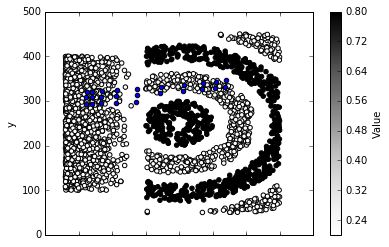

In [26]:
df.plot(kind='scatter',x='x',y='y', c='Value')
plt.scatter(t[:,0],t[:,1])
plt.show()

In [13]:
from PIL import Image

In [14]:
arr = np.random.randint(0,1, 500*500) #example of a 1-D array
arr.resize(500,500)

In [15]:
for index,row in df.iterrows():
    arr[int(row.y),int(row.x)] = row.Value*255

In [20]:
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
im = Image.fromarray(arr)
im.show()